In [222]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn import linear_model, preprocessing, utils
from scipy.stats import t
import matplotlib.pyplot as plt
import math

In [225]:
# 1

data_set = sm.datasets.get_rdataset('airquality')
df = data_set.data
# data_set.dropna(inplace=True)
df_clean = df.dropna()

# print sample

# Train the model using the training sets

Y_trainv1 = df_clean.ix[:,0]
X_trainv1= df_clean.ix[:,1:6]
# X_trainv1 = sm.add_constant(X_trainv1)

# results = sm.OLS(Y_trainv1, X_trainv1).fit().params
# print results

regr = linear_model.LinearRegression()    
regr.fit(X_trainv1, Y_trainv1)
print '############'
print 'Raw Output'
print '############'
print regr.coef_
print regr.intercept_

# N = 10000

def bootstrap(N):
    NumberOfX = 5
    interList= []
    thetaList = [[] for _ in range(NumberOfX)]

    for i in range(N):
        sample = utils.resample(df_clean)
        Y_train = sample.ix[:,0]
        X_train = sample.ix[:,1:6]
        X_train_scaled = preprocessing.scale(X_train)
        regr.fit(X_train_scaled, Y_train)
#         regr.fit(X_train, Y_train)
        interList.append(regr.intercept_)
        for i in range(len(regr.coef_)):
            thetaList[i].append(regr.coef_[i])

    thetaList= np.sort(thetaList, axis=1)
    

    return thetaList, interList

def meanAndMedian(thetaList, interList):
    thetaMeanList = [0 for _ in range(NumberOfX)]
    interceptMeanList = []
    thetaMedianList = [0 for _ in range(NumberOfX)]
    interceptMedianList = []

    thetaMeanList= np.mean(thetaList, axis=1)
    interceptMeanList = np.mean(interList)

    thetaMedianList = np.median(thetaList, axis=1)
    interceptMedianList = np.median(interList)
    
    return thetaMeanList, interceptMeanList, thetaMedianList, interceptMedianList

print '############'
print 'Bootstrap'
print '############'
N = 500
thetaList,interList = bootstrap(N)
thetaMean, interMean, thetaMedian, interMedian = meanAndMedian(thetaList,interList)

print "mean theta: " + str(thetaMean) +" mean intercept: " + str(interMean)
print "median theta: " + str(thetaMedian) +" median intercept: " + str(interMedian)

############
Raw Output
############
[ 0.05027432 -3.31844386  1.89578642 -3.03995664  0.27387752]
-64.1163211033
############
Bootstrap
############
mean theta: [  4.55888501 -11.92604228  17.83042074  -4.42138146   2.27678347] mean intercept: 42.2634954955
median theta: [  4.50337682 -11.92791992  17.90696721  -4.33874375   2.19630484] median intercept: 42.3153153153


In [226]:
# 2 

alpha = 0.01

# 
def quantileTheta(lis):
    mini = np.percentile(thetaList, 0.5, axis=1)
    maxi= np.percentile(thetaList, 99.5, axis=1)
    return mini, maxi

def quantileInter(lis):
    mini = np.percentile(thetaList, 0.5)
    maxi= np.percentile(thetaList, 99.5)
    return mini, maxi

miniT, maxiT = quantileTheta(thetaList)
miniI, maxiI = quantileTheta(thetaList)

for i in range(len(miniT)):
    print '[' + str(miniT[i]) + '; ' + str(maxiT[i]) + ']'

print '[' + str(miniI[i]) + '; ' + str(maxiI[i]) + ']'


[-0.0718177909493; 9.57595431156]
[-19.7419238574; -4.49690692364]
[11.5991915809; 23.7050307416]
[-9.31419750686; 0.647637694526]
[-2.80570393148; 7.29607331642]
[-2.80570393148; 7.29607331642]


In [227]:
# 3

courbeMini = []
courbeMaxi = []
courbeMedian = []
for i in range(1, 5001, 500):
    thetaList,interList = bootstrap(i)
    thetaMean, interMean, thetaMedian, interMedian = meanAndMedian(thetaList,interList)
    miniT, maxiT = quantileTheta(thetaList)
    courbeMini.append(miniT[1])
    courbeMaxi.append(maxiT[1])
    courbeMedian.append(thetaMedian[1])

print courbeMini
print courbeMaxi
print courbeMedian


[-10.613507213702498, -20.924951859093682, -19.931024482547265, -19.859685880890552, -20.026559584864376, -19.568122123585489, -19.941757229430046, -20.238416558310568, -20.179865836061715, -19.889531080916292]
[-10.613507213702498, -5.1019272749206035, -5.5347287012577118, -5.3245461791465605, -5.3449639414677268, -5.3728331269798044, -4.8831397116063098, -5.150807857860082, -5.1390185249800897, -4.8393260324939291]
[-10.613507213702498, -11.441576400338674, -11.647041486192295, -11.590619898230599, -11.500604460734046, -11.536646426279797, -11.630343468083712, -11.541459399650602, -11.617528462622563, -11.663708746078763]


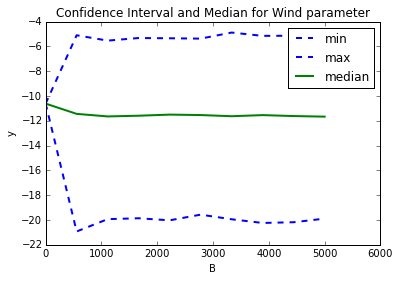

In [237]:
%matplotlib inline
# affiche le graph à l'interieur de ipython
xplot = np.linspace(1, 5001, 10)


fig = plt.figure()

# plt.plot(xplot, courbeMedian, '--',linewidth=2.0)
plt.plot(xplot, courbeMini, 'b--', label="min", linewidth=2.0)
plt.plot(xplot, courbeMaxi, 'b--', label="max", linewidth=2.0)
plt.plot(xplot, courbeMedian, 'g', label="median", linewidth=2.0)

plt.title('Confidence Interval and Median for Wind parameter')
plt.xlabel('B')
plt.ylabel('y')

plt.legend(frameon=True)
# plt.show()

In [254]:
# 4



# results = sm.OLS(Y_trainv1, X_trainv1).fit().params
# print results

data_set = sm.datasets.get_rdataset('airquality')
df = data_set.data
# data_set.dropna(inplace=True)
df_clean = df.dropna()

regr1 = linear_model.LinearRegression() 

monthDic = {}
for i in range (1,13,1):
    dfMonth = df_clean.loc[df_clean['Month'] == i]
    if len(dfMonth) != 0:
        y_train = dfMonth[['Ozone']]
        x_train = dfMonth[['Wind']]
        regr1.fit(x_train, y_train)
        coef_temp = regr1.coef_[0][0]
        inter_temp = regr1.intercept_[0]
        monthDic[i] = [inter_temp, coef_temp]

print monthDic


{8: [141.24167564374329, -9.1685894985578749], 9: [74.187681854353286, -4.2417617172356099], 5: [58.40741423355184, -2.9799997885014271], 6: [8.9550261108736429, 1.6825252281216898], 7: [119.04413280455424, -7.0313513218339807]}
